In [37]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [38]:
%matplotlib inline

## Armo una función para cada algoritmo de clasificación: 
### Bernoulli, Multinomial, Gaussian, LogisticRegression, y k-neighbours

In [39]:
 
def totalBernoulliNB(df, normalizar):
# CONVENCION: el dataframe debe tener una columna 'target' con valores 0 y 1 correspondiente con las clases que quiero predecir

    df_x = df.drop(['target'], axis=1)
    X = df_x
    y = df.target
    
    sm = SMOTE(random_state=12)
    x_res, y_res = sm.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.33, random_state = 17)

    #Normalizo X_train
    if normalizar == True:
        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_train)
        
    bernNB = BernoulliNB(binarize = True)
    bernNB.fit(X_train, y_train)
    
    print(bernNB)
    #Normalizo X_test
    if normalizar == True:
        X_test = scaler.transform(X_test)
        
    y_expect = y_test
    y_pred = bernNB.predict(X_test)
    
    print('accuracy_score:', accuracy_score(y_expect, y_pred))
    print('f1_score:', f1_score(y_expect, y_pred))
    print('precision_score:', precision_score(y_expect, y_pred))
    print('recall_score:', recall_score(y_expect, y_pred))
    print('')
    print('Classification Report: ', classification_report(y_expect, y_pred))
    
    # Elaboramos la matriz de confusión:

    plt.figure(figsize=(4, 4)) 
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='', cbar=False)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos');
    
    plt.figure(figsize=(2, 2)) 
    labels =  np.array([['VN','FP'],['FN','VP']])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cbar=False)
    plt.show()
    
    return 'Bernoulli Ok'

def totalMultinomialNB(df, normalizar):
# CONVENCION: el dataframe debe tener una columna 'target' con valores 0 y 1 correspondiente con las clases que quiero predecir
    df_x = df.drop(['target'], axis=1)
    X = df_x
    y = df.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)
        
    sm = SMOTE(random_state=12)
    x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    # vuelvo a poner X_train e y_train en los nombres que estaban, para aprovechar el código de abajo
    X_train = x_train_res
    y_train = y_train_res
        
    #Normalizo X_train
    if normalizar == True:
        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_train)
        
    multiNB = MultinomialNB()
    multiNB.fit(X_train, y_train)
    
    print(multiNB)
    #Normalizo X_test
    if normalizar == True:
        X_test = scaler.transform(X_test)
        
    y_expect = y_test
    y_pred = multiNB.predict(X_test)
    
    print('accuracy_score:', accuracy_score(y_expect, y_pred))
    print('f1_score:', f1_score(y_expect, y_pred))
    print('precision_score:', precision_score(y_expect, y_pred))
    print('recall_score:', recall_score(y_expect, y_pred))
    print('')
    print('Classification Report: ', classification_report(y_expect, y_pred))

    # Elaboramos la matriz de confusión:
    plt.figure(figsize=(4, 4)) 
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='', cbar=False)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos');
    
    plt.figure(figsize=(2, 2)) 
    labels =  np.array([['VN','FP'],['FN','VP']])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cbar=False)
    plt.show()
    
    return 'Multinomial Ok'

def totalGaussianNB(df, normalizar):
# CONVENCION: el dataframe debe tener una columna 'target' con valores 0 y 1 correspondiente con las clases que quiero predecir
    df_x = df.drop(['target'], axis=1)
    X = df_x
    y = df.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)
    
    sm = SMOTE(random_state=12)
    x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    # vuelvo a poner X_train e y_train en los nombres que estaban, para aprovechar el código de abajo
    X_train = x_train_res
    y_train = y_train_res
    
    #Normalizo X_train
    if normalizar == True:
        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_train)

    gaussianNB = GaussianNB()
    gaussianNB.fit(X_train, y_train)
    
    print(gaussianNB)
    #Normalizo X_test
    if normalizar == True:
        X_test = scaler.transform(X_test)
        
    y_expect = y_test
    y_pred = gaussianNB.predict(X_test)
    
    print('accuracy_score:', accuracy_score(y_expect, y_pred))
    print('f1_score:', f1_score(y_expect, y_pred))
    print('precision_score:', precision_score(y_expect, y_pred))
    print('recall_score:', recall_score(y_expect, y_pred))
    print('')
    print('Classification Report: ', classification_report(y_expect, y_pred))
    
#AGREGAR EL indicador PROBA Y JUGAR CON EL THRESHOLD VER

    # Elaboramos la matriz de confusión:
    plt.figure(figsize=(4, 4)) 
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='', cbar=False)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos');
    
    plt.figure(figsize=(2, 2)) 
    labels =  np.array([['VN','FP'],['FN','VP']])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cbar=False)
    plt.show()
    
    return 'Gaussian Ok'


def totalLogRegression(df, normalizar):
# CONVENCION: el dataframe debe tener una columna 'target' con valores 0 y 1 correspondiente con las clases que quiero predecir
    df_x = df.drop(['target'], axis=1)
    X = df_x
    y = df.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)
    
    sm = SMOTE(random_state=12)
    x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    # vuelvo a poner X_train e y_train en los nombres que estaban, para aprovechar el código de abajo
    X_train = x_train_res
    y_train = y_train_res
    
    #Normalizo X_train
    if normalizar == True:
        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_train)

        
    kf = KFold(n_splits=10, random_state=None, shuffle=True)
    logit = LogisticRegression()
    
    logit.fit(X_train, y_train)

    print(logit)
    #Normalizo X_test
    if normalizar == True:
        X_test = scaler.transform(X_test)
        
    y_expect = y_test
    #y_pred_train = logit.predict(X_train)
    y_pred = logit.predict(X_test)
    
    print('accuracy_score:', accuracy_score(y_expect, y_pred))
    print('f1_score:', f1_score(y_expect, y_pred))
    print('precision_score:', precision_score(y_expect, y_pred))
    print('recall_score:', recall_score(y_expect, y_pred))
    print('')
    print('Classification Report: ', classification_report(y_expect, y_pred))

    # Elaboramos la matriz de confusión:
    plt.figure(figsize=(4, 4)) 
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='', cbar=False)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos');
    
    plt.figure(figsize=(2, 2)) 
    labels =  np.array([['VN','FP'],['FN','VP']])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cbar=False)
    plt.show()
    
    return 'Logistic Regression Ok'


from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
import matplotlib

# funcion para evaluar las distintas metodos de clusterin jerárquico, dado el vector de X
def eval_clusters_linkage(X, link_method):
    L = linkage(X, link_method)
    c, coph_dists = cophenet(L, pdist(X))
    print(link_method, c)
    plt.figure(figsize=[6,6])
    plt.title('Dendrogram - Method: ' + link_method.title())
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(L, leaf_rotation=90., leaf_font_size=5.)

def totalKNeighbors(df, normalizar, k):
 # CONVENCION: el dataframe debe tener una columna 'target' con valores 0 y 1 correspondiente con las clases que quiero predecir
    df_x = df.drop(['target'], axis=1)
    X = df_x
    y = df.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

    sm = SMOTE(random_state=12)
    x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    # vuelvo a poner X_train e y_train en los nombres que estaban, para aprovechar el código de abajo
    X_train = x_train_res
    y_train = y_train_res

    #Normalizo X_train
    if normalizar == True:
        scaler = preprocessing.StandardScaler()
        X_train = scaler.fit_transform(X_train)
    
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train,y_train)
    
    print(model_knn)
    #Normalizo X_test
    if normalizar == True:
        X_test = scaler.transform(X_test)
        
    y_expect = y_test
    #y_pred_train = logit.predict(X_train)
    y_pred = model_knn.predict(X_test)
    
    print('accuracy_score:', accuracy_score(y_expect, y_pred))
    print('f1_score:', f1_score(y_expect, y_pred))
    print('precision_score:', precision_score(y_expect, y_pred))
    print('recall_score:', recall_score(y_expect, y_pred))
    print('')
    print('Classification Report: ', classification_report(y_expect, y_pred))

    # Elaboramos la matriz de confusión:
    plt.figure(figsize=(4, 4)) 
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='', cbar=False)
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos');
    
    plt.figure(figsize=(2, 2)) 
    labels =  np.array([['VN','FP'],['FN','VP']])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cbar=False)
    plt.show()
    
    return 'KNeighborsClassifier Ok'

## Cargo el dataset y lo proceso para utilizar

In [143]:
df = pd.read_csv('adult.csv')
df = df.applymap(lambda x : np.nan if x == "?" else x).dropna()
df.reset_index(inplace=True)

df_new = df
df_new = df_new.drop(['index'], axis=1)
df_new = df_new.drop(['education'], axis=1)
df_new.columns = ['edad', 'clase', 'peso_final', 'educacion', 'estado_civil', 'ocupacion', 'relacion', 'raza', 'sexo',
       'ganancias', 'perdidas', 'horas_semana', 'pais', 'income']

df_new['target'] = df_new.income
df_new['target'] = df_new['target'].map({'<=50K': 0, '>50K': 1})

df_new.reset_index(inplace=True)
df_new = df_new.drop(['index'], axis=1)

df_leandro = pd.read_csv("df_cat.csv")
df_leandro = df_leandro[['US', 'age_cuartiles', 'cat_trabajo']]
df_leandro.reset_index(inplace=True)
df_leandro = df_leandro.drop(['index'], axis=1)
df_new[['US', 'age_cuartiles', 'cat_trabajo']] = df_leandro[['US', 'age_cuartiles', 'cat_trabajo']]

# crear variables dummies 
df_dummies = pd.get_dummies(df_new.clase, prefix='clase') 
df_new = pd.concat([df_new, df_dummies], axis=1)
df_dummies = pd.get_dummies(df_new.estado_civil, prefix='estado_civil') 
df_new = pd.concat([df_new, df_dummies], axis=1)
df_dummies = pd.get_dummies(df_new.ocupacion, prefix='ocupacion') 
df_new = pd.concat([df_new, df_dummies], axis=1)
df_dummies = pd.get_dummies(df_new.relacion, prefix='relacion') 
df_new = pd.concat([df_new, df_dummies], axis=1)
df_dummies = pd.get_dummies(df_new.raza, prefix='raza') 
df_new = pd.concat([df_new, df_dummies], axis=1)
df_dummies = pd.get_dummies(df_new.sexo, prefix='sexo') 
df_new = pd.concat([df_new, df_dummies], axis=1)
df_dummies = pd.get_dummies(df_new.age_cuartiles, prefix='age_cuartiles') 
df_new = pd.concat([df_new, df_dummies], axis=1)
df_dummies = pd.get_dummies(df_new.cat_trabajo, prefix='cat_trabajo') 
df_new = pd.concat([df_new, df_dummies], axis=1)


#creo un df para pasarle a las funciones. Le saco las features que no voy a usar (categóricas, y otras que no quiera)
df_test = df_new.drop(['edad', 'clase', 'peso_final', 'educacion', 'estado_civil', 'ocupacion', 'relacion', 'raza', 'sexo',
       'ganancias', 'perdidas', 'horas_semana', 'pais', 'income', 'age_cuartiles', 'cat_trabajo'], axis=1)
df_test.shape


(30162, 50)

## Pruebo una corrida con cada algoritmo para seleccionar el de mejor score

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
accuracy_score: 0.5767121455323703
f1_score: 0.2702640378185172
precision_score: 1.0
recall_score: 0.15624583388881483

Classification Report:                precision    recall  f1-score   support

           0       0.54      1.00      0.70      7451
           1       1.00      0.16      0.27      7501

   micro avg       0.58      0.58      0.58     14952
   macro avg       0.77      0.58      0.49     14952
weighted avg       0.77      0.58      0.49     14952



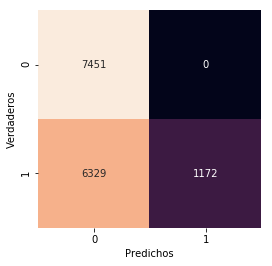

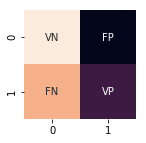

'Bernoulli Ok'

In [148]:
totalBernoulliNB(df_test, 'True')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')
accuracy_score: 0.7815953385573639
f1_score: 0.5882575757575756
precision_score: 0.5558339298496778
recall_score: 0.6246983105390185

Classification Report:                precision    recall  f1-score   support

           0       0.87      0.83      0.85      7468
           1       0.56      0.62      0.59      2486

   micro avg       0.78      0.78      0.78      9954
   macro avg       0.71      0.73      0.72      9954
weighted avg       0.79      0.78      0.79      9954



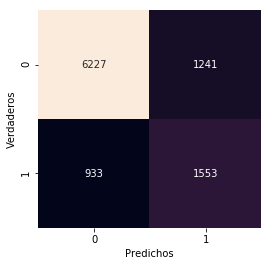

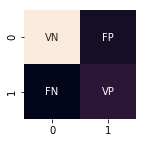

'KNeighborsClassifier Ok'

In [141]:
totalKNeighbors(df_test, 'True', 10)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
accuracy_score: 0.7914406268836649
f1_score: 0.6445205479452055
precision_score: 0.5611210494931426
recall_score: 0.7570394207562349

Classification Report:                precision    recall  f1-score   support

           0       0.91      0.80      0.85      7468
           1       0.56      0.76      0.64      2486

   micro avg       0.79      0.79      0.79      9954
   macro avg       0.73      0.78      0.75      9954
weighted avg       0.82      0.79      0.80      9954



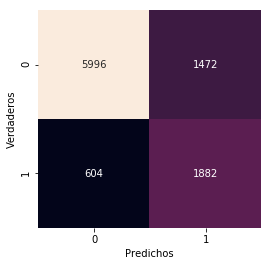

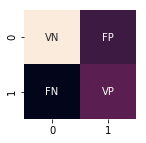

'Multinomial Ok'

In [147]:
totalMultinomialNB(df_test, 'True')

GaussianNB(priors=None, var_smoothing=1e-09)
accuracy_score: 0.7502511553144464
f1_score: 0.0
precision_score: 0.0
recall_score: 0.0

Classification Report:                precision    recall  f1-score   support

           0       0.75      1.00      0.86      7468
           1       0.00      0.00      0.00      2486

   micro avg       0.75      0.75      0.75      9954
   macro avg       0.38      0.50      0.43      9954
weighted avg       0.56      0.75      0.64      9954



/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


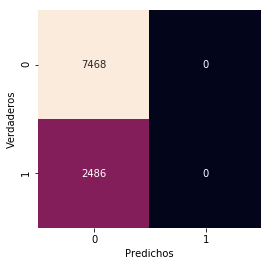

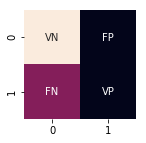

'Gaussian Ok'

In [146]:
totalGaussianNB(df_test, 'True')

/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
accuracy_score: 0.7963632710468154
f1_score: 0.6482734686795072
precision_score: 0.5700335672871529
recall_score: 0.7514078841512469

Classification Report:                precision    recall  f1-score   support

           0       0.91      0.81      0.86      7468
           1       0.57      0.75      0.65      2486

   micro avg       0.80      0.80      0.80      9954
   macro avg       0.74      0.78      0.75      9954
weighted avg       0.82      0.80      0.80      9954



/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


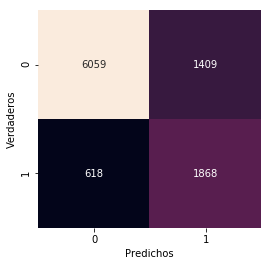

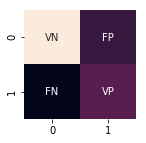

'Logistic Regression Ok'

In [145]:
totalLogRegression(df_test, 'True')

## Predicción con el mejor modelo y con el DF completo y balanceado

/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
accuracy_score: 0.820406992142668
f1_score: 0.828727188532699
precision_score: 0.792033796016898
recall_score: 0.8689856096053677

Classification Report:                precision    recall  f1-score   support

           0       0.85      0.77      0.81     22654
           1       0.79      0.87      0.83     22654

   micro avg       0.82      0.82      0.82     45308
   macro avg       0.82      0.82      0.82     45308
weighted avg       0.82      0.82      0.82     45308



/opt/conda/envs/geopandas/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


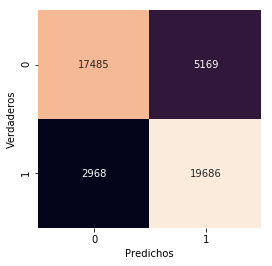

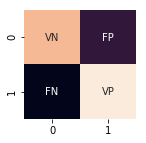

In [144]:
df_test = df_test.drop(['US'], axis=1)


# en este caso no hace falta normalizar porque son todas variables dummie    
normalizar = False

df_x = df_test.drop(['target'], axis=1)
X = df_x
y = df_test.target
    
# genero y resguardo un juego de X e y balanceadas para testear contra el dataframe completo
sm = SMOTE(random_state=12)
X_bal, y_bal = sm.fit_sample(X, y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 17)
    
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
# vuelvo a poner X_train e y_train en los nombres que estaban, para aprovechar el código de abajo
X_train = x_train_res
y_train = y_train_res
    
#Normalizo X_train
if normalizar == True:
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
        
logit = LogisticRegression()
    
logit.fit(X_train, y_train)

print(logit)
#Normalizo X_test
if normalizar == True:
    X_test = scaler.transform(X_test)

# Pruebo con el Dataframe completo y balanceado
X_test = X_bal
y_test = y_bal
y_pred = logit.predict(X_test)
    
print('accuracy_score:', accuracy_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))
print('')
print('Classification Report: ', classification_report(y_test, y_pred))

# Elaboramos la matriz de confusión:
plt.figure(figsize=(4, 4)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='', cbar=False)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
    
plt.figure(figsize=(2, 2)) 
labels =  np.array([['VN','FP'],['FN','VP']])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cbar=False)
plt.show()
    